<a href="https://colab.research.google.com/github/rubengarhid/Projects/blob/main/Nested_Koch_Snowflake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nested Koch Snowflake**
Author: Rubén Garrido Hidalgo



# **Libraries we are going to use:**
- Matplotlib
- Numpy
- Random

# **Introduction**

This project is part of an annex added to my undergraduate thesis, in which I have personally combined structures studied in the thesis itself, such as fractals driven by the study of dynamical systems and the Banach Contraction Principle by implementing the concept of a Koch Snowflake (a curve fractal) within the structure of a point attractor of an Iterated Function System (IFS). Here, the attracted “point” is, in fact, a scaled copy of the Koch Snowflake itself. The idea is that the iterations of the IFS not only move a single point, but manipulate the entire Koch Snowflake as an object.

This approach merges two fundamental concepts:

* *The Koch Snowflake* : a classical fractal constructed through recursive geometric replacement.

* *Iterated Function Systems (IFS)* : which use affine contractions to define attractors, typically sets of points.

In this case, the IFS is applied to a more complex object the Koch curve rather than to individual points. Each function in the IFS transforms the entire snowflake, producing a self-similar structure at different scales. This reflects a deeper application of the Banach Fixed Point Theorem in a complete metric space of fractals, where the attractor becomes a fixed point of the IFS operator acting on the space of sets.

The result is a recursive, fractal-based transformation where the IFS iterates not over points, but over embedded copies of the Koch Snowflake, highlighting the interplay between geometric recursion and analytic contraction. This enriches both the visual complexity and the theoretical depth of the system, demonstrating how fractal objects can serve as the “points” attracted under iterated morphological transformations.

# **The Koch curve or Koch's snowflake**

We will present the basic structure that will serve as the foundation for our development: the Koch Snowflake. This classical fractal will act as our elementary geometric module for subsequently constructing a more complex structure: a mixed fractal that combines this snowflake with an Iterated Function System (IFS). This combination is the key tool that will allow us to generate the innovative structure of a Nested Koch Snowflake, where the attractor of the IFS is not a set of points but a scaled replica of the snowflake itself.

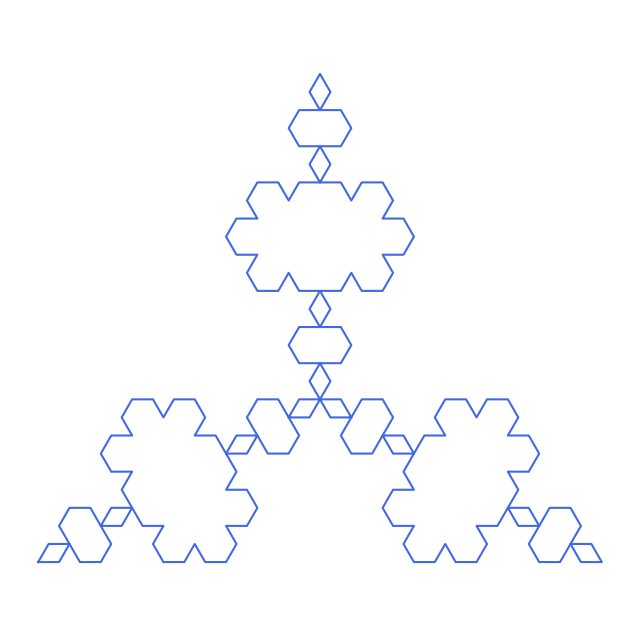

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=10):
    """
    Devuelve las coordenadas x, y del copo de nieve de Koch completo de un orden dado.
    """
    def koch_curve(p1, p2, order):
        if order == 0:
            return [p1, p2]
        else:
            p1 = np.array(p1)
            p2 = np.array(p2)
            delta = p2 - p1

            pA = p1 + delta / 3
            pB = p1 + delta * 2 / 3

            angle = np.pi / 3
            pC = pA + np.array([
                np.cos(angle) * (delta[0] / 3) - np.sin(angle) * (delta[1] / 3),
                np.sin(angle) * (delta[0] / 3) + np.cos(angle) * (delta[1] / 3)
            ])

            return (
                koch_curve(p1, pA, order - 1)[:-1] +
                koch_curve(pA, pC, order - 1)[:-1] +
                koch_curve(pC, pB, order - 1)[:-1] +
                koch_curve(pB, p2, order - 1)
            )

    # Definir triángulo equilátero inicial
    p1 = [0, 0]
    p2 = [scale, 0]
    h = np.sin(np.pi/3) * scale
    p3 = [scale / 2, h]

    points = (
        koch_curve(p1, p2, order)[:-1] +
        koch_curve(p2, p3, order)[:-1] +
        koch_curve(p3, p1, order)
    )
    x, y = zip(*points)
    return x, y

# Ajusta el orden para mayor complejidad
order = 3

x, y = koch_snowflake(order)

plt.figure(figsize=(8, 8))
plt.plot(x, y, color='royalblue')
plt.axis('equal')
plt.axis('off')
#plt.title(f'Copo de Nieve de Koch (orden {order})')
plt.show()


# Construction of the Koch Snowflake



The Koch Snowflake is constructed through an iterative and recursive process that begins with a simple initiator and applies a geometric replacement rule at each step:

- **Step 0** (Initiator): Start with an equilateral triangle. This is the seed or initial state.

- **Step 1** (Generator): Divide each side of the triangle into three segments of equal length. On the middle segment of each side, construct another outward-facing equilateral triangle. Remove the base of this new triangle (the original middle segment).

The result is a star-like shape (a hexagram) with 12 sides.

- **Step 3** (Iteration): This same process is applied recursively to every resulting straight line segment from the previous iteration.

- **Step 4** (Fractal Limit): The true Koch Snowflake is the limit of this process applied an infinite number of times.

It is a continuous curve that is nowhere differentiable (it has no tangent) and has an infinite perimeter, yet it encloses a finite area.

Properties: With each iteration, the number of sides increases by a factor of 4.

Starting from 3 sides:

- Iteration 1:  3×4=12  sides

- Iteration 2:  12×4=48  sides

- Iteration  n :  3×4n  sides

This curve, with its property of self-similarity at different scales, is the "building block" that our IFS will manipulate and transform to create the nested pattern.

# **Mixed Fractal Proposal "Koch Snowflake Nested in an Attractor":**

Let's imagine an IFS with three or four transformations. Instead of drawing a point each time, each transformation "draws" a small copy of the Koch Snowflake. But the way these copies are distributed won't be to form a larger snowflake, but rather to form a pattern of "clouds" or "clusters" of smaller snowflakes.

The novelty here is that we're not creating a spiral or a Sierpinski. Instead, we're using the Koch Snowflake as our fundamental "atom" or "molecule." Then, a point-attractor IFS (chaos game) positions it.

Generando plantilla de Copo de Nieve de Koch (orden 6)...
Posicionando 5000 Copos de Nieve de Koch...


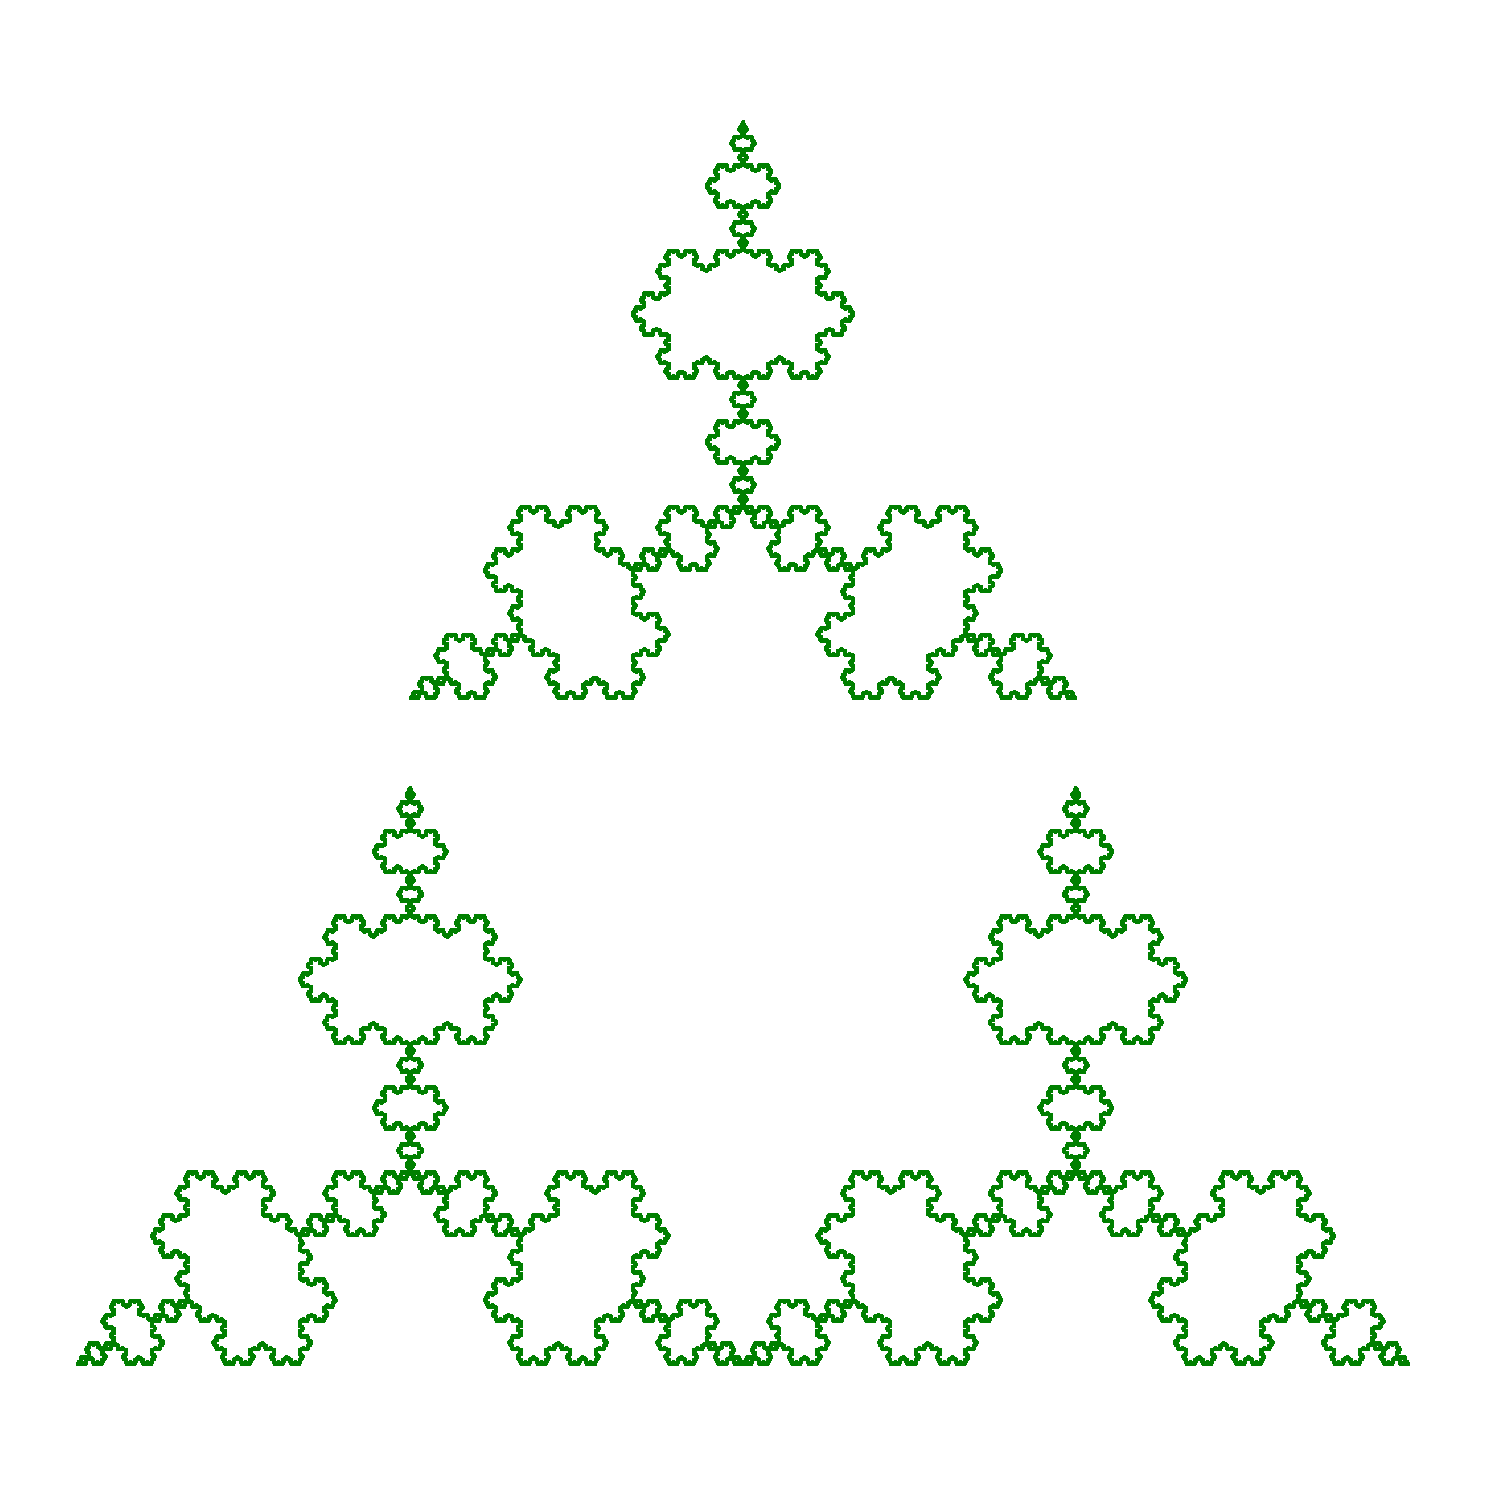

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# --- 1. Koch Snowflake Generator (the complex base fractal) ---
#Let's start by generating the points for a segment of the Koch curve:
def koch_snowflake_segment(start_point, end_point, order):
    if order == 0:
        return [start_point, end_point]

    p1_x, p1_y = start_point
    p2_x, p2_y = end_point

    # We divide the segment into thirds:
    s = (p2_x - p1_x) / 3
    t = (p2_y - p1_y) / 3

    pA = start_point
    pB = (p1_x + s, p1_y + t)
    pD = (p1_x + 2 * s, p1_y + 2 * t)
    pE = end_point

    # We calculate the "tip" point of the equilateral triangle and rotate pD-pB 60 degrees:
    angle = np.pi / 3
    pC_x = pB[0] + (pD[0] - pB[0]) * np.cos(angle) - (pD[1] - pB[1]) * np.sin(angle)
    pC_y = pB[1] + (pD[0] - pB[0]) * np.sin(angle) + (pD[1] - pB[1]) * np.cos(angle)
    pC = (pC_x, pC_y)

    # We recursively call each of the 4 new segments
    segment_points = []
    segment_points.extend(koch_snowflake_segment(pA, pB, order - 1))
    segment_points.extend(koch_snowflake_segment(pB, pC, order - 1))
    segment_points.extend(koch_snowflake_segment(pC, pD, order - 1))
    segment_points.extend(koch_snowflake_segment(pD, pE, order - 1))

    return segment_points

# The next step will be to generate the points for a complete Koch Snowflake.
def generate_koch_snowflake(order=3):
    #Vertices of the equilateral triangle
    side_length = 1.0
    h = side_length * np.sqrt(3) / 2

    p1 = (0.0, h / 2)
    p2 = (-side_length / 2, -h / 2)
    p3 = (side_length / 2, -h / 2)

    all_points = []
    all_points.extend(koch_snowflake_segment(p1, p2, order))
    all_points.extend(koch_snowflake_segment(p2, p3, order))
    all_points.extend(koch_snowflake_segment(p3, p1, order))

    # We convert the points to numpy arrays:
    points_np = np.array(all_points).T


    # We remove duplicate starting and ending periods:
    unique_points_list = []
    for p in all_points:
        if p not in unique_points_list:
            unique_points_list.append(p)

    x_coords = np.array([p[0] for p in unique_points_list])
    y_coords = np.array([p[1] for p in unique_points_list])

    # We normalize so that the snowflake is in a standard range according to the points we have.
    min_x, max_x = np.min(x_coords), np.max(x_coords)
    min_y, max_y = np.min(y_coords), np.max(y_coords)
    scale = 2.0 / max(max_x - min_x, max_y - min_y)
    x_norm = (x_coords - (min_x + max_x) / 2) * scale
    y_norm = (y_coords - (min_y + max_y) / 2) * scale

    return x_norm, y_norm

# --- 2. Generalized Affine Transformation Function ---
# Applies an affine transformation [A | B] to a set of points.
    #points_np: Numpy array of shape (2, N)
    #matrix_A: 2x2 matrix for scaling and rotation
    #vector_B: 2x1 vector for translation
def apply_affine_transform(x_coords, y_coords, matrix_A, vector_B):
    points = np.vstack((x_coords, y_coords))
    transformed_points = matrix_A @ points + vector_B[:, np.newaxis] # Aplica B a todas las columnas
    return transformed_points[0, :], transformed_points[1, :]

# --- 3. Main Function for the Mixed Fractal (IFS with Snowflakes) ---
# We create a mixed fractal where small Koch Snowflakes group together to form a larger structure similar to a point IFS.
# The arguments we will use for the construction are:
      # num_clusters (int): Number of "clusters" (Snowflakes) to position.
      # koch_order (int): Recursion order for each individual Snowflake. (A higher order consumes more memory and time.)
def create_koch_cluster_fractal(num_clusters=10000, koch_order=2):

    # We generate a single Koch Snowflake as a template:
    print(f"Generando plantilla de Copo de Nieve de Koch (orden {koch_order})...")
    koch_template_x, koch_template_y = generate_koch_snowflake(order=koch_order)

    # We define the IFS transformations to position the snowflakes, which are randomly chosen to position the next snowflake.

# First transformation: Shrink and move down-left
    s1 = 0.5
    theta1 = np.radians(0) # Sin rotación
    A1 = np.array([[s1, 0], [0, s1]])
    B1 = np.array([-0.5, -0.5])
    p1 = 0.33

    # Second Transformation: Shrink and move up
    s2 = 0.5
    theta2 = np.radians(0) # Sin rotación
    A2 = np.array([[s2, 0], [0, s2]])
    B2 = np.array([0.0, 0.5])
    p2 = 0.33

    # Third Transformation: Shrink and move down-right
    s3 = 0.5
    theta3 = np.radians(0) # Sin rotación
    A3 = np.array([[s3, 0], [0, s3]])
    B3 = np.array([0.5, -0.5])
    p3 = 0.34 # Ensures that the probabilities add up to 1

    transformations = [(A1, B1, p1), (A2, B2, p2), (A3, B3, p3)]
    probabilities = np.array([t[2] for t in transformations])
    probabilities /= probabilities.sum() # Normalize the probabilities

    all_fractal_x = []
    all_fractal_y = []

    # We assign a reference point that moves with the IFS (it is not a real point, but a "position")
    current_center = np.array([0.0, 0.0])

    print(f"Posicionando {num_clusters} Copos de Nieve de Koch...")
    for i in range(num_clusters):
        # Choose a transformation:
        idx = np.random.choice(len(transformations), p=probabilities)
        A, B, _ = transformations[idx]

        # We update the central point of the following Snowflake:
        current_center = A @ current_center + B

        # We apply the same transformation to the initial Snowflake so that it scales, rotates, and moves to the 'current_center' position.
        # That is, the IFS transformation is applied to the entire Koch snowflake.

        # This is where fractal blending occurs: the IFS doesn't just position a point, but an entire fractal, in this case a Koch snowflake.
        # Note:
        # If we want each Snowflake to shrink and move, we need A and B.
        # The simplest way is to use the A and B transformations directly in the template:
        transformed_koch_x, transformed_koch_y = apply_affine_transform(
            koch_template_x, koch_template_y, A, B
        )

        all_fractal_x.extend(transformed_koch_x)
        all_fractal_y.extend(transformed_koch_y)

    return np.array(all_fractal_x), np.array(all_fractal_y)

# --- Generation and representation of the Final Mixed Fractal ---
x_mixed_koch, y_mixed_koch = create_koch_cluster_fractal(num_clusters=5000, koch_order=6)

plt.figure(figsize=(10, 10), dpi=150)
plt.plot(x_mixed_koch, y_mixed_koch, '.', markersize=0.1, color='green', alpha=0.7)
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()

# **Goals and motivation**

The objective of this project is to continue the research initiated on the applications of the Banach Contraction Principle to Iterated Function Systems (IFS). Given its broad applicability and the expansion of horizons through the generation of fractals, which have multiple implementations, including fractal image compression and their use in texture mapping on three-dimensional surfaces. We are motivated to study them further due to their strong relationship with the main theorem of my thesis, the Banach Contraction Principle.

This type of compression is based on representing an image through a contractive transformation in an image space, such that the associated fixed point is close to the original image. This general approach encompasses various encoding schemes, many of which have been the subject of research in recent decades. Although the theoretical foundations of the method are well established thanks to the Banach Fixed Point Theorem less attention has been paid to the development of image models that consistently support its effectiveness. It is worth noting that although purely fractal methods do not usually surpass the most modern compression techniques, hybrid schemes combining fractal compression with other methods have shown significantly better results.

One of the most interesting practical applications involves using these compressed images as textures on three-dimensional surfaces. The mathematical properties of fractals allow leveraging features such as self-similarity, stability under initial conditions, resolution independence, and the possibility of infinite resolution enhancement. This is especially useful in the field of graphic modeling, where it is necessary to represent detailed textures with low memory consumption.

Furthermore, this technique enables rapid texture creation, offers a compact representation, and can be more efficient and aesthetically pleasing from a perceptual standpoint for the end user. However, it is important to note that the process can be affected by errors due to the temporal nature of image creation or the introduction of noise, as well as by probabilistic distortion effects during decompression.